Theoretical Questions

Q. 1.	What is Boosting in Machine Learning?

Answer :-

Boosting is an ensemble technique that combines the predictions of several weak learners (typically decision trees) to produce a strong learner. It builds models sequentially, with each new model focusing on correcting the errors made by the previous ones.

Q. 2.	How does Boosting differ from Bagging?

Answer :-

Bagging trains models in parallel on different random subsets of data and combines them (e.g., Random Forest).
Boosting trains models sequentially, where each model tries to correct the errors of the previous one (e.g., AdaBoost, Gradient Boosting).

Q. 3.	What is the key idea behind AdaBoost?

Answer :-

AdaBoost adjusts the weights of training instances so that subsequent classifiers focus more on difficult examples. It combines weak classifiers into a single strong classifier by assigning them weights based on accuracy.

Q. 4.	Explain the working of AdaBoost with an example.

Answer :-

AdaBoost initializes equal weights to all training samples. After each round, it increases weights for misclassified samples and trains the next weak learner. It combines all weak learners using weighted majority voting (for classification).

Q. 5.	What is Gradient Boosting, and how is it different from AdaBoost?

Answer :-

Gradient Boosting minimizes a loss function by adding models that predict the residuals of prior models. Unlike AdaBoost, which adjusts weights on samples, Gradient Boosting optimizes a differentiable loss function using gradient descent.

Q. 6.	What is the loss function in Gradient Boosting?

Answer :-

Depends on the task:
o	Regression: Mean Squared Error (MSE)
o	Classification: Log Loss or Deviance

Q. 7.	How does XGBoost improve over traditional Gradient Boosting?

Answer :-

o	Regularization (L1 & L2)
o	Parallelized tree building
o	Handling missing values
o	Pruning trees using max depth and gain thresholds

Q. 8.	What is the difference between XGBoost and CatBoost?

Answer :-

o	XGBoost supports numerical and encoded categorical features.
o	CatBoost natively handles categorical variables efficiently and avoids the need for preprocessing.

Q. 9.	What are some real-world applications of Boosting techniques?

Answer :-

o	Fraud detection
o	Customer churn prediction
o	Search ranking
o	Medical diagnosis
o	Credit scoring

Q. 10.	How does regularization help in XGBoost?

Answer :-

It prevents overfitting by penalizing model complexity using L1 (Lasso) and L2 (Ridge) terms in the objective function.

Q. 11.	What are some hyperparameters to tune in Gradient Boosting models?

Answer :-

o	learning_rate
o	n_estimators
o	max_depth
o	subsample
o	min_samples_split
o	loss

Q. 12.	What is the concept of Feature Importance in Boosting?

Answer :-

It measures how useful each feature is in constructing the boosted trees, often calculated based on the total gain or frequency a feature is used in splits.

Q. 13.	Why is CatBoost efficient for categorical data?

Answer :-

It automatically handles categorical variables using techniques like target statistics and permutations, reducing preprocessing and preventing overfitting.


Practical Question

In [ ]:
# Q. 14. Train an AdaBoost Classifier on a sample dataset and print model accuracy.

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 1.0


In [ ]:
# Q. 15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error ( MAE ).

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the AdaBoost Regressor
model = AdaBoostRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.6497879664773323


In [ ]:
# Q. 16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Get and print feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
                    Feature  Importance
7       mean concave points    0.450528
27     worst concave points    0.240103
20             worst radius    0.075589
22          worst perimeter    0.051408
21            worst texture    0.039886
23               worst area    0.038245
1              mean texture    0.027805
26          worst concavity    0.018725
16          concavity error    0.013068
13               area error    0.008415
10             radius error    0.006870
24         worst smoothness    0.004811
19  fractal dimension error    0.004224
11            texture error    0.003604
5          mean compactness    0.002996
15        compactness error    0.002511
4           mean smoothness    0.002467
17     concave points error    0.002038
28           worst symmetry    0.001478
12          perimeter error    0.001157
6            mean concavity    0.000922
18           symmetry error    0.000703
14         smoothness error    0.000556
8             mean 

In [ ]:
# Q. 17. Train a Gradient Boosting Regressor and evaluate using R-Sequared Score.

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate using R-squared Score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.7756446042829697


In [ ]:
# Q. 18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

# Train XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)

# Print accuracies
print("Gradient Boosting Classifier Accuracy:", gb_acc)
print("XGBoost Classifier Accuracy:", xgb_acc)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:07:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Classifier Accuracy: 0.956140350877193
XGBoost Classifier Accuracy: 0.956140350877193


In [5]:
# Q. 19. Train a CatBoost Classifier and evaluate using F1-Score.

!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.9 MB/s eta 0:00:00


In [6]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification
import numpy as np

In [7]:
# Create synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize CatBoost classifier
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='F1',
    random_seed=42,
    verbose=100  # prints progress every 100 iterations
)

# Train the model
model.fit(X_train, y_train)

0:	learn: 0.8782936	total: 57.8ms	remaining: 28.9s
100:	learn: 1.0000000	total: 1.41s	remaining: 5.57s
200:	learn: 1.0000000	total: 2.71s	remaining: 4.04s
300:	learn: 1.0000000	total: 3.51s	remaining: 2.32s
400:	learn: 1.0000000	total: 4.04s	remaining: 997ms
499:	learn: 1.0000000	total: 4.66s	remaining: 0us


In [9]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.9064


In [10]:
from sklearn.model_selection import cross_val_score

# Using cross-validation with F1 scoring
cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print(f"Cross-validated F1-Scores: {cv_scores}")
print(f"Mean F1-Score: {np.mean(cv_scores):.4f}")

0:	learn: 0.8724180	total: 8.36ms	remaining: 4.17s
100:	learn: 0.9987516	total: 1.17s	remaining: 4.62s
200:	learn: 1.0000000	total: 2.25s	remaining: 3.35s
300:	learn: 1.0000000	total: 3.23s	remaining: 2.13s
400:	learn: 1.0000000	total: 3.77s	remaining: 931ms
499:	learn: 1.0000000	total: 4.33s	remaining: 0us
0:	learn: 0.8683887	total: 5.71ms	remaining: 2.85s
100:	learn: 1.0000000	total: 575ms	remaining: 2.27s
200:	learn: 1.0000000	total: 1.2s	remaining: 1.78s
300:	learn: 1.0000000	total: 1.8s	remaining: 1.19s
400:	learn: 1.0000000	total: 2.37s	remaining: 585ms
499:	learn: 1.0000000	total: 2.97s	remaining: 0us
0:	learn: 0.8743842	total: 6.26ms	remaining: 3.13s
100:	learn: 1.0000000	total: 666ms	remaining: 2.63s
200:	learn: 1.0000000	total: 1.34s	remaining: 2s
300:	learn: 1.0000000	total: 2.2s	remaining: 1.46s
400:	learn: 1.0000000	total: 3.7s	remaining: 913ms
499:	learn: 1.0000000	total: 5.21s	remaining: 0us
0:	learn: 0.8812729	total: 10.9ms	remaining: 5.43s
100:	learn: 0.9987516	total: 

In [11]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 500]
}

# Grid search with F1 scoring
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                          cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
best_f1 = f1_score(y_test, best_model.predict(X_test))
print(f"Best F1-Score after tuning: {best_f1:.4f}")

0:	learn: 0.8880309	total: 28.7ms	remaining: 14.3s
100:	learn: 1.0000000	total: 2.31s	remaining: 9.13s
200:	learn: 1.0000000	total: 4.52s	remaining: 6.73s
300:	learn: 1.0000000	total: 7.11s	remaining: 4.7s
400:	learn: 1.0000000	total: 9.48s	remaining: 2.34s
499:	learn: 1.0000000	total: 12s	remaining: 0us
Best F1-Score after tuning: 0.8966


In [ ]:
# Q. 20. Train an XGBoost Regressor and evaluate using Mean Squared Error ( MSE ).

from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost Regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.22726228796011422


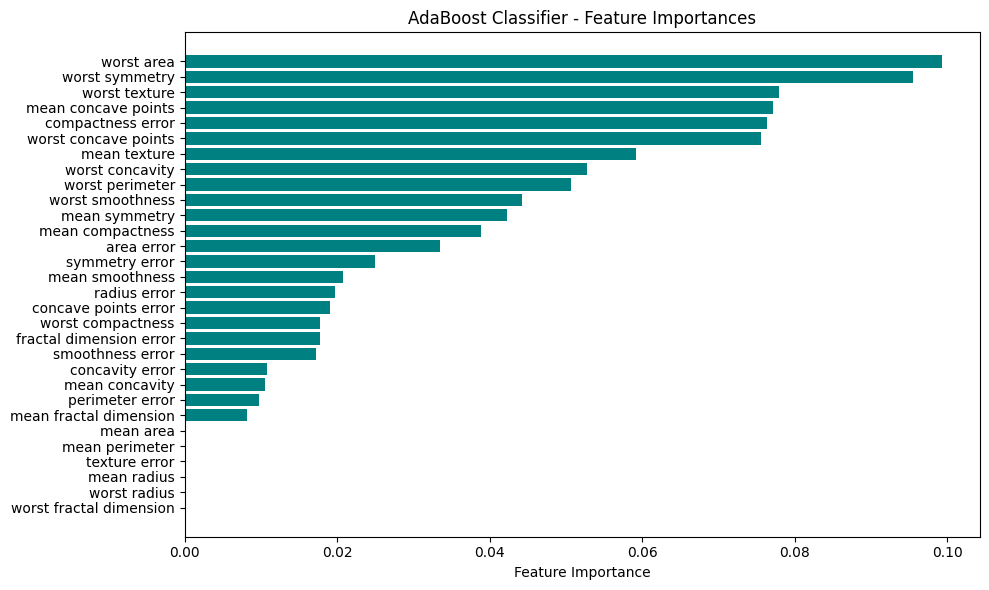

In [ ]:
# Q. 21. Train an AdaBoost Classifier and visualize feature importance.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='teal')
plt.xlabel('Feature Importance')
plt.title('AdaBoost Classifier - Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


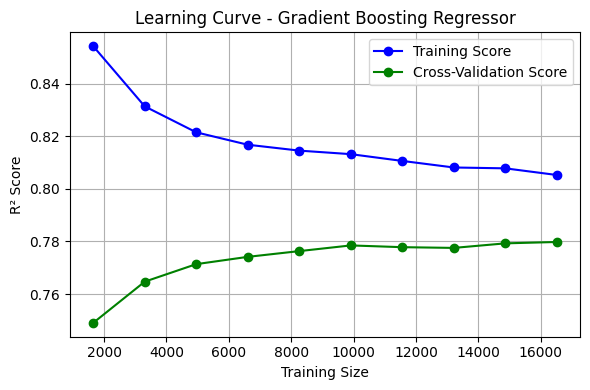

In [ ]:
# Q. 22. Train a Gradient Boosting Regressor and plot learning curves.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Define the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Define cross-validation strategy
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=cv, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate mean and std
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-Validation Score')
plt.title('Learning Curve - Gradient Boosting Regressor')
plt.xlabel('Training Size')
plt.ylabel('R² Score')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


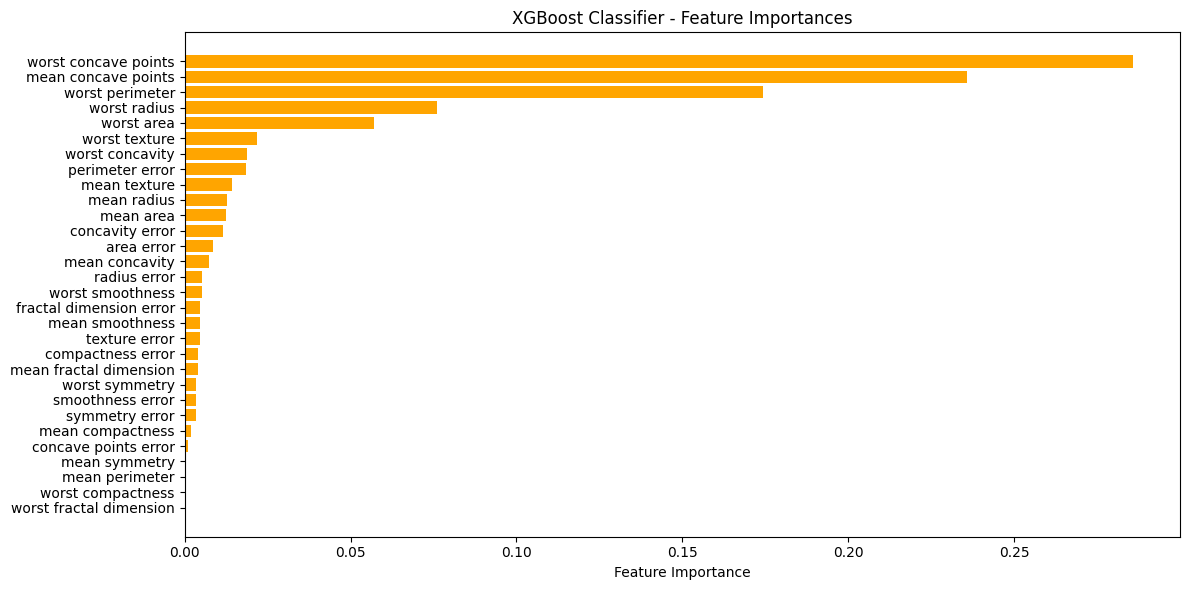

In [ ]:
# Q. 23. Train an XGBoost Classifier and visualize feature importance.

import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='orange')
plt.xlabel("Feature Importance")
plt.title("XGBoost Classifier - Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [14]:
# Q. 24. Train a CatBoost Classifier and plot the confusion matrix.

!pip install catboost matplotlib seaborn


In [15]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
# Create synthetic data (replace with your actual data)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                          weights=[0.8, 0.2], random_state=42)  # Imbalanced classes

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=42, stratify=y)

In [17]:
# Initialize CatBoost classifier
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='F1',  # Good for imbalanced data
    random_seed=42,
    class_weights=[0.8, 0.2],  # Optional: adjust for class imbalance
    verbose=100  # prints progress every 100 iterations
)

# Train the model
model.fit(X_train, y_train)

0:	learn: 0.5320197	total: 20.2ms	remaining: 10.1s
100:	learn: 0.8489796	total: 1.53s	remaining: 6.06s
200:	learn: 0.8897638	total: 2.95s	remaining: 4.39s
300:	learn: 0.9027237	total: 4.16s	remaining: 2.75s
400:	learn: 0.9318182	total: 5.97s	remaining: 1.47s
499:	learn: 0.9516729	total: 7.91s	remaining: 0us


In [18]:
# Predict on test set
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[236   3]
 [ 12  49]]


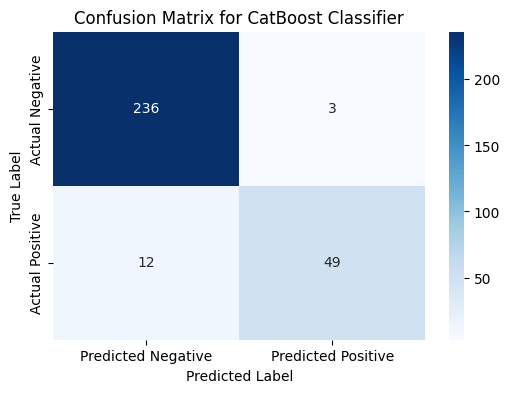

In [20]:
# Create a more visually appealing confusion matrix plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for CatBoost Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

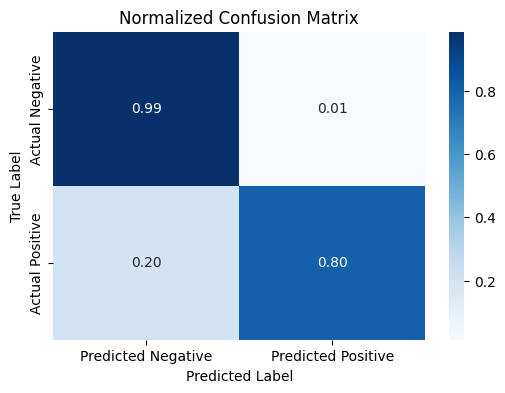

In [22]:
# Calculate normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       239
           1       0.94      0.80      0.87        61

    accuracy                           0.95       300
   macro avg       0.95      0.90      0.92       300
weighted avg       0.95      0.95      0.95       300



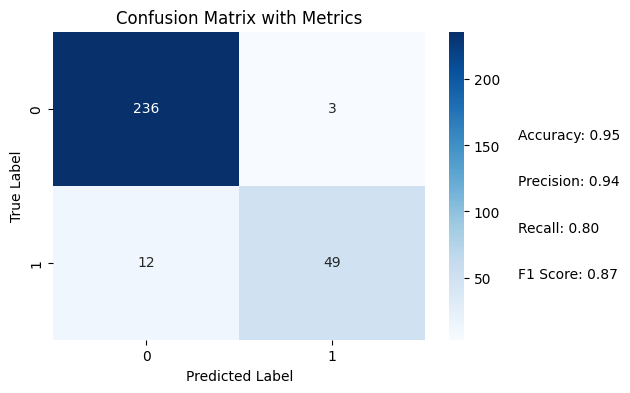

In [24]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))

# Function to plot confusion matrix with additional metrics
def plot_confusion_matrix_with_metrics(cm, classes):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix with Metrics')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # Add metrics text
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)

    plt.text(2.5, 0.7, f'Accuracy: {accuracy:.2f}', fontsize=10)
    plt.text(2.5, 1.0, f'Precision: {precision:.2f}', fontsize=10)
    plt.text(2.5, 1.3, f'Recall: {recall:.2f}', fontsize=10)
    plt.text(2.5, 1.6, f'F1 Score: {f1:.2f}', fontsize=10)
    plt.show()

plot_confusion_matrix_with_metrics(cm, ['Negative', 'Positive'])

AdaBoost Accuracy with 10 estimators: 0.9649
AdaBoost Accuracy with 50 estimators: 0.9649
AdaBoost Accuracy with 100 estimators: 0.9737
AdaBoost Accuracy with 150 estimators: 0.9737
AdaBoost Accuracy with 200 estimators: 0.9737


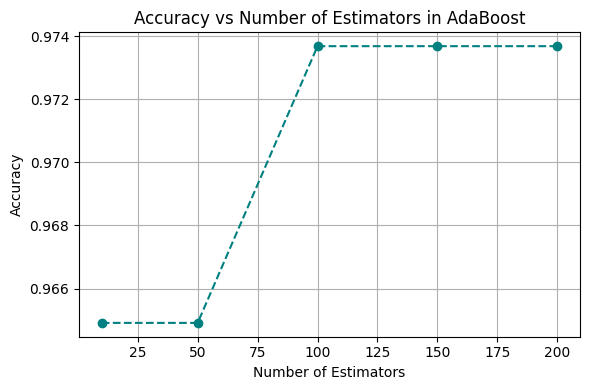

In [1]:
# Q. 25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try different numbers of estimators
estimator_list = [10, 50, 100, 150, 200]
accuracies = []

for n in estimator_list:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"AdaBoost Accuracy with {n} estimators: {acc:.4f}")

# Plotting the results
plt.figure(figsize=(6, 4))
plt.plot(estimator_list, accuracies, marker='o', linestyle='--', color='teal')
plt.title("Accuracy vs Number of Estimators in AdaBoost")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


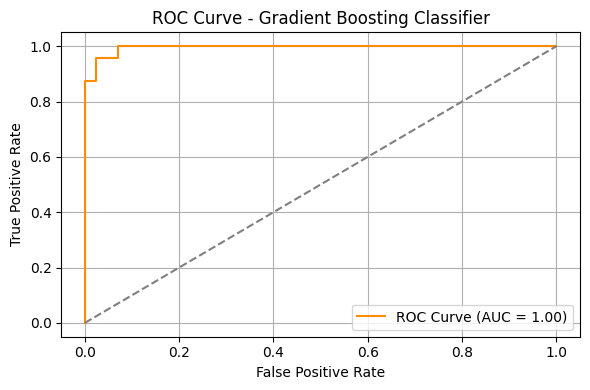

In [ ]:
# Q. 26. Train a Gradient Boosting Classifier and visualize the ROC curve.

import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Q. 27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.

from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Load California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = XGBRegressor(n_estimators=100, random_state=42)

# Define parameter grid for learning_rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Learning Rate:", grid_search.best_params_['learning_rate'])
print("Best CV MSE (Negative):", grid_search.best_score_)

# Evaluate best model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE with Best Model:", mse)


Best Learning Rate: 0.2
Best CV MSE (Negative): -0.22140365953916255
Test MSE with Best Model: 0.21596203014190907


In [25]:
# Q. 28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.

import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix,
                           f1_score, precision_score, recall_score,
                           roc_auc_score, average_precision_score)
import matplotlib.pyplot as plt
import seaborn as sns

# Create an imbalanced dataset (90% negative, 10% positive)
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2,
                          weights=[0.9, 0.1], random_state=42,
                          n_clusters_per_class=1, flip_y=0.01)

# Split into train and test sets (stratified to maintain imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Check class distribution
print("Class distribution:")
print(f"Train: {pd.Series(y_train).value_counts(normalize=True).to_dict()}")
print(f"Test: {pd.Series(y_test).value_counts(normalize=True).to_dict()}")

Class distribution:
Train: {0: 0.8968571428571429, 1: 0.10314285714285715}
Test: {0: 0.897, 1: 0.103}


In [28]:
def evaluate_model(model, X_test, y_test):
    """Evaluate model performance with multiple metrics"""
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print(f"Average Precision: {average_precision_score(y_test, y_proba):.4f}")

    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix')
    plt.show()

    return {
        'f1': f1_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'avg_precision': average_precision_score(y_test, y_proba)
    }

0:	learn: 0.9328622	test: 0.9475410	best: 0.9475410 (0)	total: 35.4ms	remaining: 35.4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9684908789
bestIteration = 39

Shrink model to first 40 iterations.
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2691
           1       0.99      0.94      0.97       309

    accuracy                           0.99      3000
   macro avg       0.99      0.97      0.98      3000
weighted avg       0.99      0.99      0.99      3000

ROC AUC: 0.9833
Average Precision: 0.9675


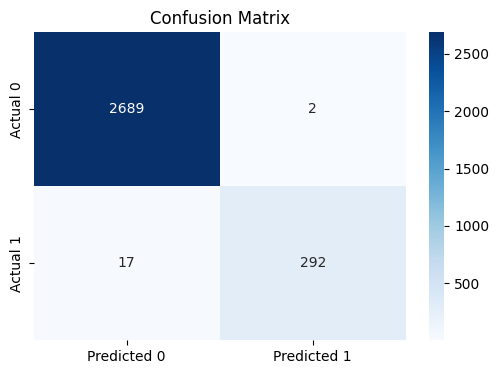

In [27]:
# Baseline model without class weighting
baseline_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='F1',
    random_seed=42,
    early_stopping_rounds=50,
    verbose=100
)

baseline_model.fit(X_train, y_train, eval_set=(X_test, y_test))
baseline_metrics = evaluate_model(baseline_model, X_test, y_test)

0:	learn: 0.9627978	test: 0.9710500	best: 0.9710500 (0)	total: 24.7ms	remaining: 24.7s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9725620305
bestIteration = 7

Shrink model to first 8 iterations.
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2691
           1       0.93      0.95      0.94       309

    accuracy                           0.99      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.99      0.99      0.99      3000

ROC AUC: 0.9805
Average Precision: 0.9608


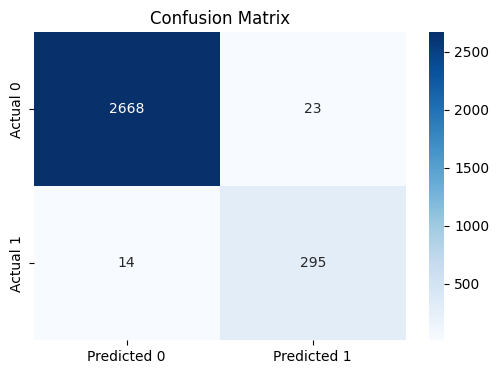

In [29]:
# Model with auto class weights (inverse class frequency)
auto_weight_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='F1',
    random_seed=42,
    auto_class_weights='Balanced',  # Automatic weighting
    early_stopping_rounds=50,
    verbose=100
)

auto_weight_model.fit(X_train, y_train, eval_set=(X_test, y_test))
auto_weight_metrics = evaluate_model(auto_weight_model, X_test, y_test)

0:	learn: 0.9627978	test: 0.9710500	best: 0.9710500 (0)	total: 23.7ms	remaining: 23.7s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9725620305
bestIteration = 7

Shrink model to first 8 iterations.
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2691
           1       0.93      0.95      0.94       309

    accuracy                           0.99      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.99      0.99      0.99      3000

ROC AUC: 0.9805
Average Precision: 0.9608


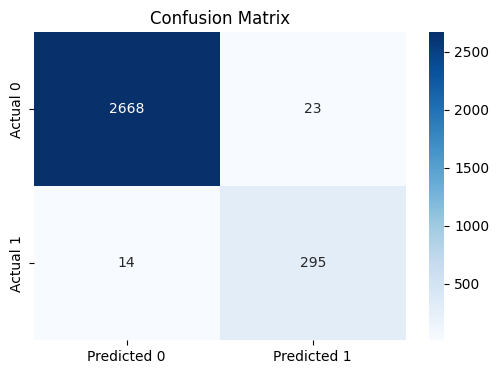

In [30]:
# Calculate manual class weights
class_counts = np.bincount(y_train)
manual_weights = {0: 1, 1: class_counts[0]/class_counts[1]}

# Model with manual class weights
manual_weight_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='F1',
    random_seed=42,
    class_weights=manual_weights,  # Manual weighting
    early_stopping_rounds=50,
    verbose=100
)

manual_weight_model.fit(X_train, y_train, eval_set=(X_test, y_test))
manual_weight_metrics = evaluate_model(manual_weight_model, X_test, y_test)


Model Comparison:
                     f1  precision    recall   roc_auc  avg_precision
Baseline       0.968491   0.993197  0.944984  0.983320       0.967478
Auto Weight    0.940989   0.927673  0.954693  0.980503       0.960780
Manual Weight  0.940989   0.927673  0.954693  0.980503       0.960780


<Figure size 600x400 with 0 Axes>

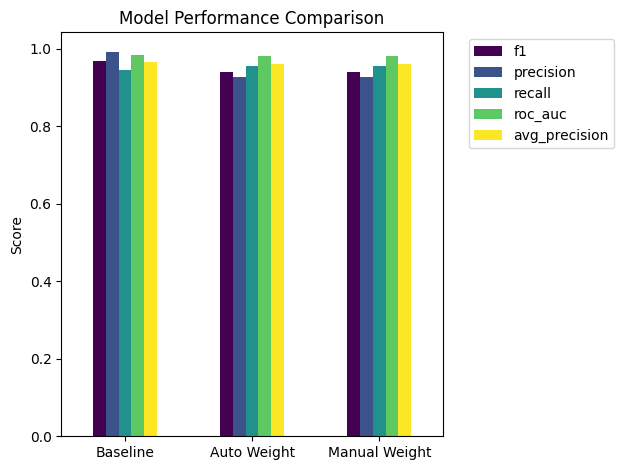

In [33]:
# Create comparison dataframe
results = pd.DataFrame({
    'Baseline': baseline_metrics,
    'Auto Weight': auto_weight_metrics,
    'Manual Weight': manual_weight_metrics
}).T

print("\nModel Comparison:")
print(results)

# Plot comparison
plt.figure(figsize=(6, 4))
results.plot(kind='bar', colormap='viridis')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

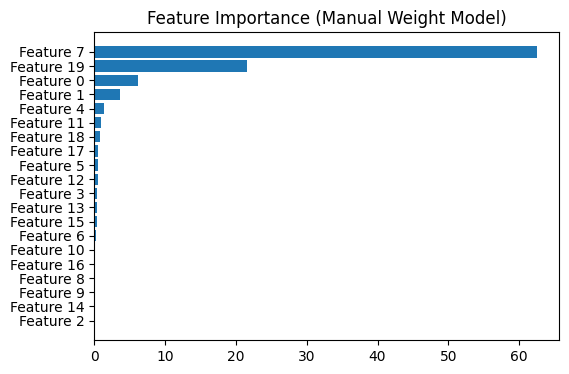

In [32]:
# Plot feature importance for the best model
plt.figure(figsize=(6, 4))
feature_importance = manual_weight_model.get_feature_importance()
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array([f'Feature {i}' for i in range(20)])[sorted_idx])
plt.title('Feature Importance (Manual Weight Model)')
plt.show()

Learning Rate: 0.01 => Accuracy: 0.9386
Learning Rate: 0.05 => Accuracy: 0.9561
Learning Rate: 0.1 => Accuracy: 0.9561
Learning Rate: 0.5 => Accuracy: 0.9649
Learning Rate: 1.0 => Accuracy: 0.9737
Learning Rate: 1.5 => Accuracy: 0.9649


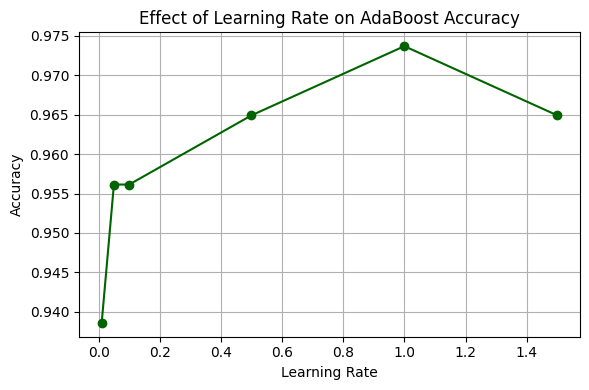

In [ ]:
# Q. 29. Train an AdaBoost Classifier and analyze the effect of different learning rates.

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different learning rates to try
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0, 1.5]
accuracies = []

# Train AdaBoost with each learning rate
for lr in learning_rates:
    model = AdaBoostClassifier(n_estimators=100, learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Learning Rate: {lr} => Accuracy: {acc:.4f}")

# Plot learning rate vs accuracy
plt.figure(figsize=(6, 4))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-', color='darkgreen')
plt.title("Effect of Learning Rate on AdaBoost Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Q. 30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss

from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Load the Iris dataset (3 classes)
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train XGBoost classifier for multi-class
model = XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss', use_label_encoder=False, random_state=42)
model.fit(X_train, y_train)

# Predict class probabilities
y_proba = model.predict_proba(X_test)

# Compute log-loss
loss = log_loss(y_test, y_proba)
print("Log Loss (Multi-class XGBoost):", round(loss, 4))


Log Loss (Multi-class XGBoost): 0.0093
